# Toxic Comment Classification	

# 1. BUSINESS UNDERSTANDING

## Project overview

Online platforms face massive volumes of user-generated content, including comments that may be toxic, abusive, or threatening. Detecting such content is essential for maintaining healthy online communities.

This project uses natural language processing (NLP) and deep learning (LSTM) to classify user comments into multiple categories of toxicity based on labeled historical data.



## Problem Statement


Can we build a model that accurately classifies a comment into multiple toxicity categories such as toxic, severe_toxic, obscene, threat, insult, and identity_hate based on the content of the text?

## Objective

### Main Objective

To build an automated multi-label text classification system that identifies and flags toxic online comments, helping content moderation teams to reduce exposure to harmful language, improve platform safety, and enhance user trust and engagement.



## Other Objective

1.Detect multiple forms of toxicity (e.g., threats, obscenity, identity-based hate, insults) using a single model.

2.Evaluate and compare multiple modeling techniques, including traditional ML (SVM, Logistic Regression), deep learning (BiLSTM, BiGRU), and transformer-based models (BERT).

3.Minimize false negatives (missing toxic content) while maintaining a low false positive rate to avoid censoring non-toxic content.

## Business Question

1.Can the system reduce manual moderation efforts?

2.What types of toxicity are most common?

3.Can we build a general-purpose model that flags toxic content early and reliably?

4.Which words or phrases most frequently contribute to toxicity?

5.How can the model improve user experience on platforms like YouTube, Reddit, or Wikipedia?

## Metric Of Success

Since this is a multi-label classification problem, appropriate evaluation metrics include:

Metric	Why It Matters

1.F1 Score (per label and macro-averaged)	Balances precision & recall — useful for imbalanced data
2.ROC-AUC Score (macro or micro)	Measures ability to separate positive vs negative classes
3.Hamming Loss	Penalizes incorrect labels across all classes
4.Subset Accuracy	Strict metric — all labels must be correctly predicted
5.Precision & Recall	Important if false positives or false negatives are costly
6.Confusion Matrix (per class)	Helps understand misclassification behavior


# 2.0 DATA UNDERSTANDING

## 2.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

##Download the databases
nltk.download("stopwords")
nltk.download("wordnet")

from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter

##Download a dic used to know if a word is neutral,positive or negative
nltk.download("vader_lexicon")

from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.linear_model import SGDClassifier


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, Embedding, GRU, Bidirectional, LSTM
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## 2.2 Load The DataSet

In [2]:
##The first dataset
df1=pd.read_csv("train.csv")
df1

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


In [3]:
##The second dataset
df2=pd.read_csv("test.csv")
df2

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


In [4]:
##check the head and tail(first dataset)
df1.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [5]:
df1.tail()

,Class Index,Title,Description
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...
119999,2,Nets get Carter from Raptors,INDIANAPOLIS -- All-Star Vince Carter was trad...


Observation:It is not corrupted(It is uniform)

In [6]:
##check the head and tail(second dataset)
df2.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [7]:
df2.tail()

,Class Index,Title,Description
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...
7599,3,EBay gets into rentals,EBay plans to buy the apartment and home renta...


In [8]:
##Check the info of first dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [9]:
##Check the info of second dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class Index  7600 non-null   int64 
 1   Title        7600 non-null   object
 2   Description  7600 non-null   object
dtypes: int64(1), object(2)
memory usage: 178.3+ KB


In [10]:
##Checking the shape(first data set)
print(f"The datast has {df1.shape[0]}rows and {df1.shape[1]} column")

The datast has 120000rows and 3 column


In [11]:
##Checking the shape(second data set)
print(f"The datast has {df2.shape[0]}rows and {df2.shape[1]} column")

The datast has 7600rows and 3 column


In [12]:
##Checking the statistical summary of first data set(numerical column)
df1.describe()

,Class Index
count,120000.000000
mean,2.500000
std,1.118039
min,1.000000
25%,1.750000
50%,2.500000
75%,3.250000
max,4.000000


In [13]:
##Checking the statistical summary of first data set(categorical column)
df1.describe(include="O")

,Title,Description
count,120000,120000
unique,114350,118723
top,Transactions,"With the economy slowly turning up, upgrading ..."
freq,39,15


In [14]:
##Checking the statistical summary of seconddata set(numerical column)
df2.describe()

,Class Index
count,7600.000000
mean,2.500000
std,1.118108
min,1.000000
25%,1.750000
50%,2.500000
75%,3.250000
max,4.000000


In [15]:
##Checking the statistical summary of second data set(categorical column)
df2.describe(include="O")

,Title,Description
count,7600,7600
unique,7568,7594
top,Today's schedule,WASHINGTON (Reuters) - The U.S. economy slowe...
freq,4,2


In [16]:
##checking the columns
df1.columns

Index(['Class Index', 'Title', 'Description'], dtype='object')

In [17]:
df2.columns

Index(['Class Index', 'Title', 'Description'], dtype='object')

# 3.0 DATA PREPARATION

Here i am going to perform the followng activities
1. Merging the data set
2. Dropping the null values
3. Dropping the duplicates or filling them
4. Changing the format 
5. Dropping unnecessary column
6. Checking for outliers

In [18]:
##merge
df=pd.concat([df1,df2],axis=0,ignore_index=True)
df

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
127595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
127596,2,Void is filled with Clement,With the supply of attractive pitching options...
127597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
127598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


In [19]:
##Checking null values
df.isnull().sum()

Class Index    0
Title          0
Description    0
dtype: int64

In [20]:
##Checking duplicates
df.duplicated().sum()

0

In [21]:
##Changing format
df.rename(columns={'Class Index': 'Class_Index'}, inplace=True)

In [22]:
##Dropping unnecesary column
df.drop("Class_Index",axis=1,inplace=True)	

# 4.0 TEXT PROCESSING

It involves the following activities:
1. Lowering the text to lowercase
2. Removal of special characters
3. Tokenization(Splitting a document or corpus)
4. Removal of stopwords
5. Lemmatization(Reducing a word to its base)

In [23]:
##initialize
stop_words=set(stopwords.words('english'))
tokenizer=RegexpTokenizer(r'\b\w{3,}\b')
lemmatizer=WordNetLemmatizer()

In [24]:
##Create a function to process text
def preprocess_text(text):
    if pd.isna(text):
        return ""
    ##lowering to lowercase
    text=str(text).lower().strip()
    ##Removal of special character
    text=re.sub(r'[^a-zA-Z\s]',"",text)
    ##Tokenization
    tokens=tokenizer.tokenize(text)
    ##Removal of stop words
    filterd_tokens=[word for word in tokens if word not in stop_words]
    ##Lemmatization
    lemmatized_tokens=[lemmatizer.lemmatize(word)for word in filterd_tokens]
    ##join
    return " ".join(lemmatized_tokens)

df["preprocess_title"]=df["Title"].apply(preprocess_text)
df["preprocess_description"]=df["Description"].apply(preprocess_text)

##print
print(df["preprocess_title"])
print(df["preprocess_description"])

0                         wall bear claw back black reuters
1          carlyle look toward commercial aerospace reuters
2                   oil economy cloud stock outlook reuters
3         iraq halt oil export main southern pipeline re...
4         oil price soar alltime record posing new menac...
                                ...                        
127595                                         around world
127596                                  void filled clement
127597                                 martinez leaf bitter
127598    arthritis patient singapore take bextra celebr...
127599                                      ebay get rental
Name: preprocess_title, Length: 127600, dtype: object
0         reuters shortsellers wall street dwindlingband...
1         reuters private investment firm carlyle groupw...
2         reuters soaring crude price plus worriesabout ...
3         reuters authority halted oil exportflows main ...
4         afp tearaway world oil price topplin

# 5.0 SENTIMENT ANALYSIS

In [25]:
##initialize
sia=SentimentIntensityAnalyzer()


##Create a function for sentiment analysis
def sentiment_analysis(text):
    if pd.isna(text) or text.strip()=="":
        return "neutral"

    score=sia.polarity_scores(text)["compound"]
    if  score>=0.05:
        return "positive"
    elif score<=-0.05:
        return "negative"
    else:
        return "neutral"

df["sentiment_preprocess_title"]=df["preprocess_title"].apply(sentiment_analysis)
df["sentiment_preprocess_description"]=df["preprocess_description"].apply(sentiment_analysis)

print("sentiment distribution(title):\n",df["sentiment_preprocess_title"].value_counts())
print("sentiment distribution(description):\n",df["sentiment_preprocess_description"].value_counts())
        

sentiment distribution(title):
 sentiment_preprocess_title
neutral     62771
negative    33623
positive    31206
Name: count, dtype: int64
sentiment distribution(description):
 sentiment_preprocess_description
positive    58595
negative    45376
neutral     23629
Name: count, dtype: int64


# 6.0 EDA

In [26]:
df.head()

,Title,Description,preprocess_title,preprocess_description,sentiment_preprocess_title,sentiment_preprocess_description
0,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",wall bear claw back black reuters,reuters shortsellers wall street dwindlingband...,neutral,neutral
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,carlyle look toward commercial aerospace reuters,reuters private investment firm carlyle groupw...,neutral,positive
2,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,oil economy cloud stock outlook reuters,reuters soaring crude price plus worriesabout ...,neutral,negative
3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,iraq halt oil export main southern pipeline re...,reuters authority halted oil exportflows main ...,neutral,negative
4,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",oil price soar alltime record posing new menac...,afp tearaway world oil price toppling record s...,negative,negative


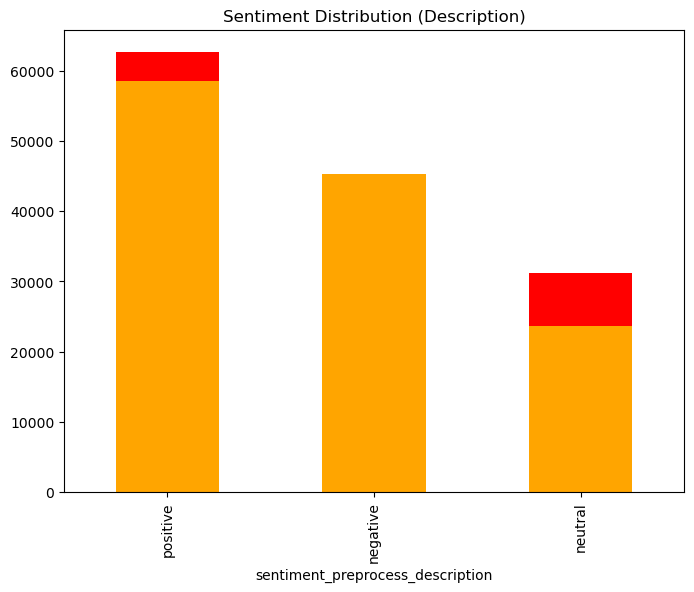

In [27]:
## Understand your sentiment label balance.
# Title sentiment distribution
plt.figure(figsize=(8,6))
df['sentiment_preprocess_title'].value_counts().plot(kind='bar', title='Sentiment Distribution (Title)', color='red')

# Description sentiment distribution
df['sentiment_preprocess_description'].value_counts().plot(kind='bar', title='Sentiment Distribution (Description)', color='orange')
plt.show()


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
##Top common words in positive vs negative sentiments (useful for explainability).

def top_words(texts, label, sentiment):
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,1))
    X = vectorizer.fit_transform(texts[df[label] == sentiment])
    words = vectorizer.get_feature_names_out()
    counts = X.sum(axis=0).A1
    freq = pd.DataFrame({'word': words, 'count': counts}).sort_values(by='count', ascending=False)
    return freq.head(20)

top_words(df['preprocess_title'], 'sentiment_preprocess_title', 'positive')


,word,count
15750,win,2693
11090,profit,1743
12018,reuters,1112
12683,security,951
12852,share,942
9555,new,841
8307,ltbgtltbgt,833
12524,say,718
15119,update,715
6347,help,655


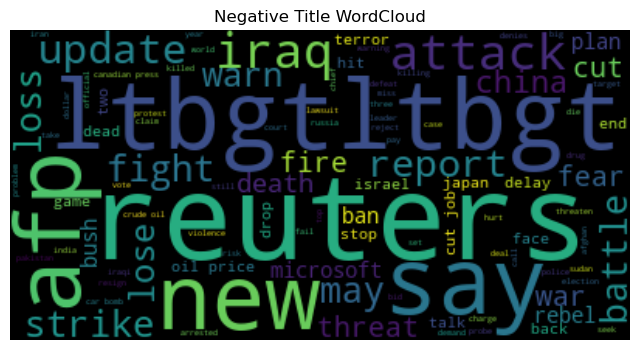

In [29]:
##negative words
text = " ".join(df[df['sentiment_preprocess_title']=='negative']['preprocess_title'])
plt.figure(figsize=(8,12))
wordcloud = WordCloud(background_color='black', max_words=100).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title("Negative Title WordCloud")
plt.show()


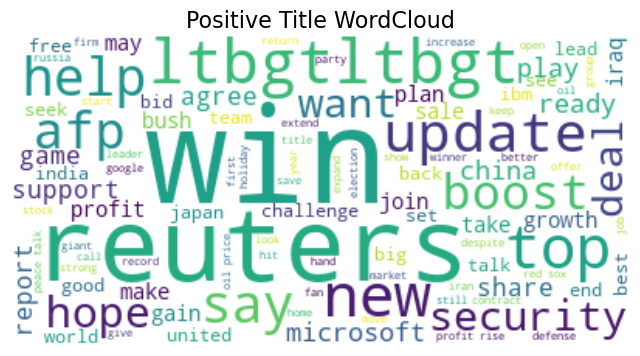

In [30]:

# Positive word cloud
text = " ".join(df[df['sentiment_preprocess_title'] == 'positive']['preprocess_title'])
wordcloud = WordCloud(background_color='white', max_words=100).generate(text)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Title WordCloud", fontsize=16)
plt.show()


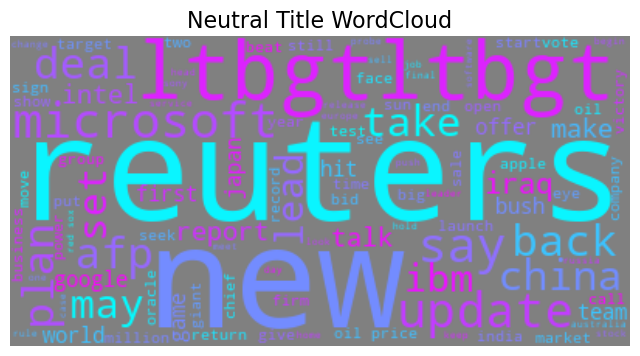

In [31]:
# Neutral word cloud
text = " ".join(df[df['sentiment_preprocess_title'] == 'neutral']['preprocess_title'])
wordcloud = WordCloud(background_color='gray', max_words=100, colormap='cool').generate(text)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Neutral Title WordCloud", fontsize=16)
plt.show()


In [32]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

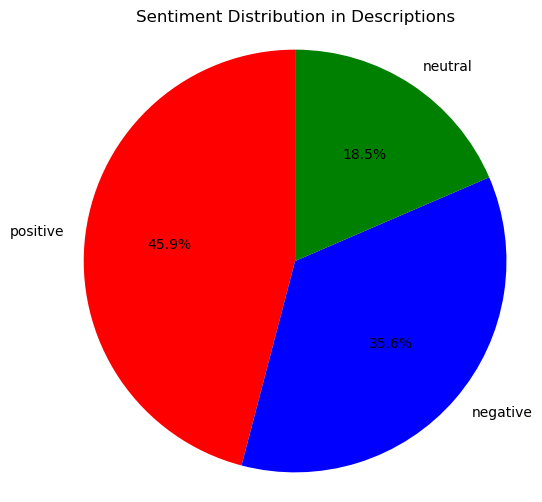

In [33]:

# Count the sentiment labels
sentiment_counts = df["sentiment_preprocess_description"].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
colors = ["red","blue","green"]
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Sentiment Distribution in Descriptions")
plt.axis('equal')
plt.show()


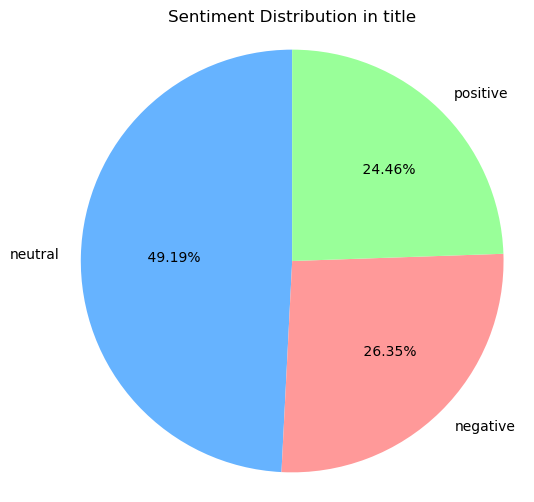

In [34]:

# Count the sentiment labels
sentiment_counts = df["sentiment_preprocess_title"].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
colors = ['#66b3ff', '#ff9999', '#99ff99']
plt.pie(sentiment_counts, labels=sentiment_counts.index,autopct='%9.2f%%',startangle=90, colors=colors)
plt.title("Sentiment Distribution in title")
plt.axis('equal')
plt.show()


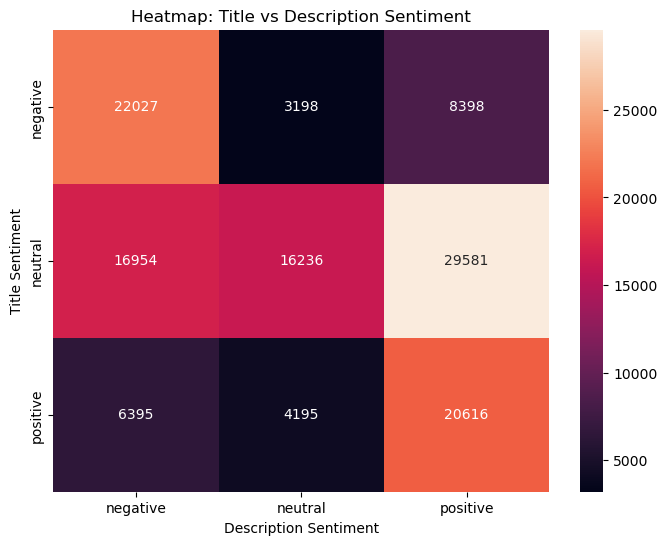

In [35]:
##Heatmap
# Create a confusion matrix-style DataFrame
cross_sentiment = pd.crosstab(df["sentiment_preprocess_title"], df["sentiment_preprocess_description"])

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_sentiment, fmt='d',annot=True, color='red')
plt.title("Heatmap: Title vs Description Sentiment")
plt.xlabel("Description Sentiment")
plt.ylabel("Title Sentiment")
plt.show()


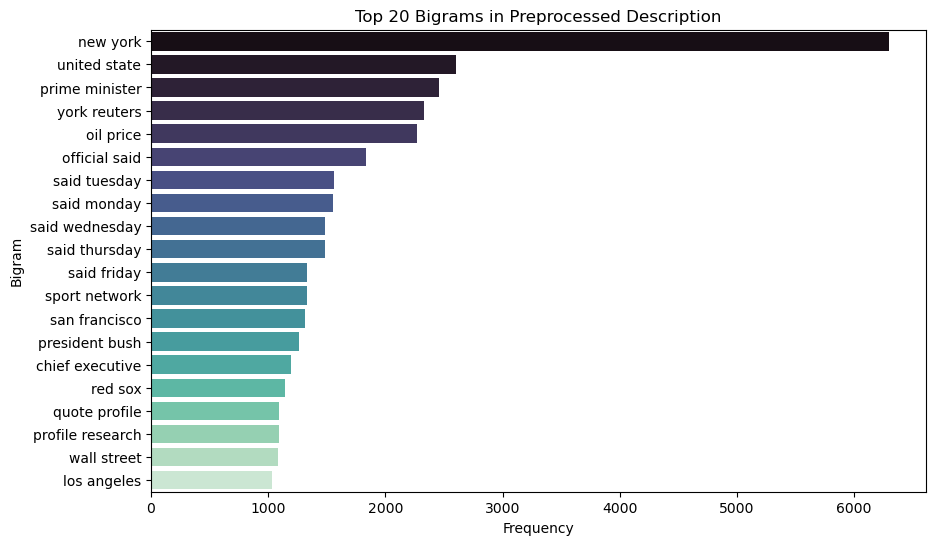

In [36]:
##Bigram
# Create a vectorizer for bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = vectorizer.fit_transform(df["preprocess_description"])

# Sum and sort bigrams
bigram_counts = X.sum(axis=0).A1
bigram_vocab = vectorizer.get_feature_names_out()
bigram_freq = dict(zip(bigram_vocab, bigram_counts))

# Top 20 most common bigrams
top_bigrams = Counter(bigram_freq).most_common(20)

# Plot
bigram_df = pd.DataFrame(top_bigrams, columns=["bigram", "count"])
plt.figure(figsize=(10,6))
sns.barplot(data=bigram_df, y="bigram", x="count", palette="mako")
plt.title("Top 20 Bigrams in Preprocessed Description")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.show()


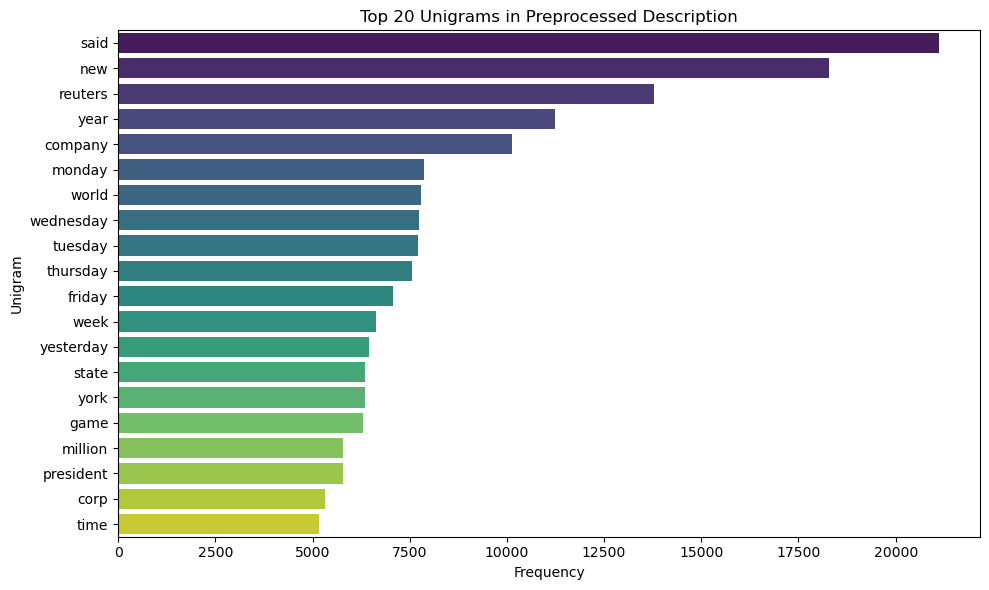

In [37]:
##unigram

# 1. Vectorize text using unigrams only
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,1))
X = vectorizer.fit_transform(df["preprocess_description"])

# 2. Extract vocabulary and count
unigram_counts = X.sum(axis=0).A1
unigram_vocab = vectorizer.get_feature_names_out()
unigram_freq = dict(zip(unigram_vocab, unigram_counts))

# 3. Get top 20 most frequent unigrams
top_unigrams = Counter(unigram_freq).most_common(20)

# 4. Convert to DataFrame and plot
unigram_df = pd.DataFrame(top_unigrams, columns=["unigram", "count"])
plt.figure(figsize=(10,6))
sns.barplot(data=unigram_df, y="unigram", x="count", palette="viridis")
plt.title("Top 20 Unigrams in Preprocessed Description")
plt.xlabel("Frequency")
plt.ylabel("Unigram")
plt.tight_layout()
plt.show()


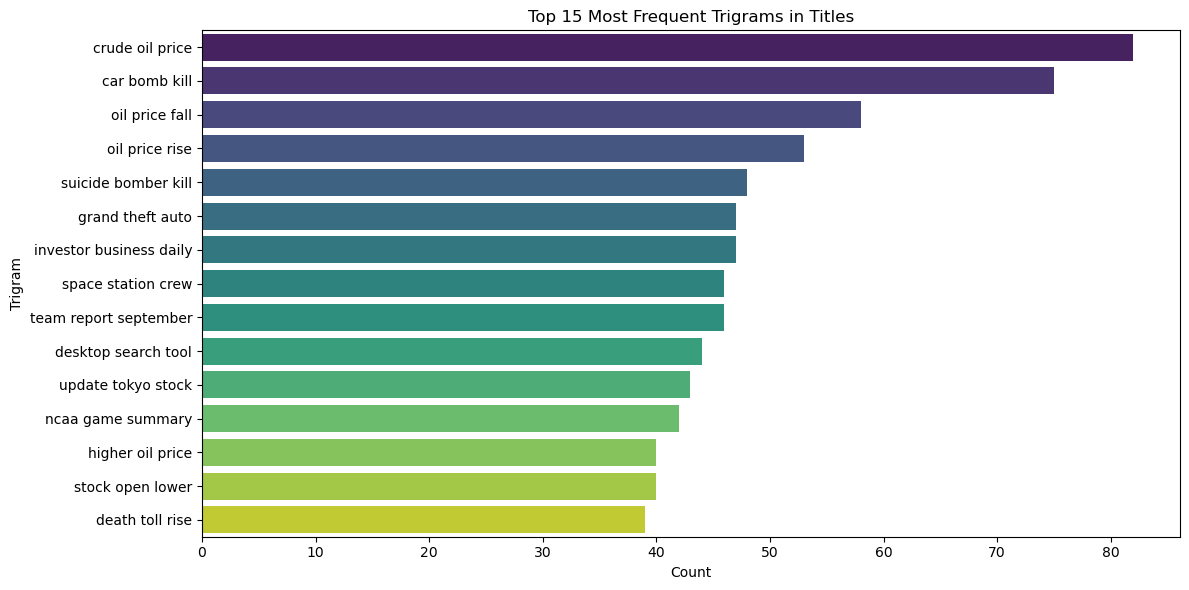

In [38]:
##Trigram

# Join all titles into one string
titles_text = " ".join(df["preprocess_title"].dropna())

# Use CountVectorizer for trigrams
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')
X = vectorizer.fit_transform([titles_text])

# Sum the counts of trigrams
trigram_counts = X.toarray().sum(axis=0)
trigram_vocab = vectorizer.get_feature_names_out()

# Create DataFrame of trigrams and their counts
trigram_df = pd.DataFrame({"trigram": trigram_vocab, "count": trigram_counts})
top_trigrams = trigram_df.sort_values(by="count", ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_trigrams, x="count", y="trigram", palette="viridis")
plt.title("Top 15 Most Frequent Trigrams in Titles")
plt.xlabel("Count")
plt.ylabel("Trigram")
plt.tight_layout()
plt.show()



# 7.0 MODELING

Here am going to use two models as base models that is:
1. Logistic Regression
2. SGD Classifier

## 7.1 Balanced

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.linear_model import SGDClassifier

In [40]:
df.head()

,Title,Description,preprocess_title,preprocess_description,sentiment_preprocess_title,sentiment_preprocess_description
0,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",wall bear claw back black reuters,reuters shortsellers wall street dwindlingband...,neutral,neutral
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,carlyle look toward commercial aerospace reuters,reuters private investment firm carlyle groupw...,neutral,positive
2,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,oil economy cloud stock outlook reuters,reuters soaring crude price plus worriesabout ...,neutral,negative
3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,iraq halt oil export main southern pipeline re...,reuters authority halted oil exportflows main ...,neutral,negative
4,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",oil price soar alltime record posing new menac...,afp tearaway world oil price toppling record s...,negative,negative


In [41]:
##split into target and predictor
X=df["preprocess_description"]
y=df["sentiment_preprocess_description"]

In [42]:
##Lets do label encoder to convert y to integers(Preprocessing)
le=LabelEncoder()
y=le.fit_transform(y)

In [43]:

##train the model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)   ##20% is used for testing 80% for training


In [44]:
##Tfidf
tfidf=TfidfVectorizer(stop_words="english",max_features=5000)


In [45]:
##build a pipeline using logistic and svm and using class weights
log_reg_pipeline=Pipeline([
    ("tfidf",tfidf),
    ("log_reg",LogisticRegression(max_iter=1000,random_state=42,class_weight="balanced"))])

sgdc_pipeline=Pipeline([
    ("tfidf",tfidf),
    ("svm", SGDClassifier(loss='hinge', max_iter=1000,random_state=42,class_weight="balanced"))
])

In [46]:

##train both models
log_reg_pipeline.fit(X_train,y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('log_reg',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [47]:
sgdc_pipeline.fit(X_train,y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('svm',
                 SGDClassifier(class_weight='balanced', random_state=42))])

In [48]:

##predict
y_pred_log=log_reg_pipeline.predict(X_test)
y_pred_sgdc=sgdc_pipeline.predict(X_test)


In [49]:
##accuracy score
log_reg_accuracy=accuracy_score(y_test,y_pred_log)
sgdc_accuracy=accuracy_score(y_test,y_pred_sgdc)

In [50]:
##classification report
print(classification_report(y_test, y_pred_log))


print(classification_report(y_test, y_pred_sgdc))


print(f"The accuracy level of logistic regression is {log_reg_accuracy*100} %")
print(f"The accuracy of sgdc classifier is {sgdc_accuracy*100} %")

              precision    recall  f1-score   support

           0       0.89      0.82      0.86      9123
           1       0.64      0.90      0.75      4686
           2       0.93      0.84      0.88     11711

    accuracy                           0.84     25520
   macro avg       0.82      0.85      0.83     25520
weighted avg       0.86      0.84      0.85     25520

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      9123
           1       0.61      0.83      0.70      4686
           2       0.90      0.81      0.85     11711

    accuracy                           0.81     25520
   macro avg       0.79      0.81      0.79     25520
weighted avg       0.83      0.81      0.81     25520

The accuracy level of logistic regression is 84.28291536050156 %
The accuracy of sgdc classifier is 80.9717868338558 %


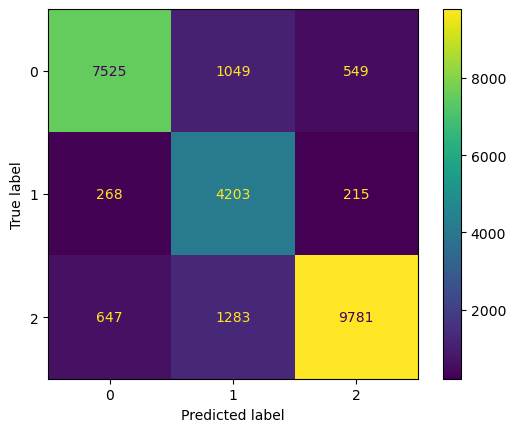

In [51]:
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log))

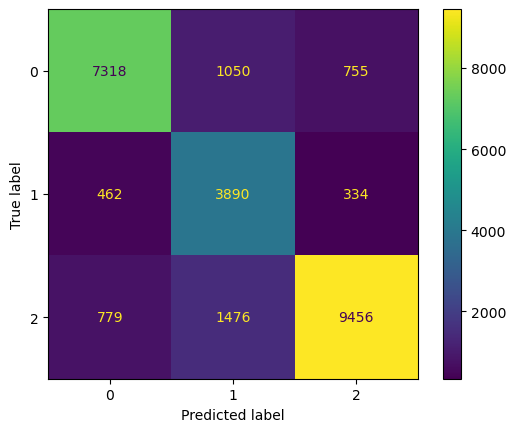

In [52]:
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred_sgdc))

## 7.2 Balanced and Tuned

In [53]:
##split into target and predictor
X=df["preprocess_description"]
y=df["sentiment_preprocess_description"]

##Lets do label encoder to convert y to integers(Preprocessing)
le=LabelEncoder()
y=le.fit_transform(y)


##train the model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)   ##20% is used for testing 80% for training

##Tfidf
tfidf=TfidfVectorizer(stop_words="english",max_features=5000)


##build a pipeline using logistic and svm and using class weights
log_reg_pipeline=Pipeline([
    ("tfidf",tfidf),
    ("log_reg",LogisticRegression(max_iter=1000,random_state=42,class_weight="balanced"))])


###sgd

sgd_pipeline=Pipeline([
    ("tfidf",tfidf),
    ("svm", SGDClassifier(loss='hinge', max_iter=1000,random_state=42,class_weight="balanced"))
])


##Hyperparameter tuning(GridSearchCv)

log_reg_params={
    "log_reg__C":[0.01,0.1,1,10,100],  ##Regularization
    "log_reg__penalty":['l1','l2'],     ###lasso and ridge
    "log_reg__solver": ['liblinear']}


sgd_params = {
    "svm__alpha": [1e-4, 1e-3, 1e-2, 0.1],          # Regularization strength
    "svm__penalty": ['l2', 'l1', 'elasticnet'],
     "svm__l1_ratio": [0.15, 0.5, 0.7]   # Only used when penalty is 'elasticnet'
}


log_reg_grid=GridSearchCV(log_reg_pipeline,log_reg_params,n_jobs=-1,cv=5,scoring="f1_weighted")

sgd_grid=GridSearchCV(sgd_pipeline,sgd_params,n_jobs=-1,cv=5,scoring="f1_weighted")    # n_jobs=-1 Use all CPU cores,cv=5 5-fold cross-validation,#scoring="f1_weighted" Good for imbalanced multiclass
  
# Fit the grid search
log_reg_grid.fit(X_train, y_train)
sgd_grid.fit(X_train, y_train)

###find the best model after tuning
best_log_reg=log_reg_grid.best_estimator_
best_sgd=sgd_grid.best_estimator_

###predict
y_log_pred=best_log_reg.predict(X_test)
y_sgd_pred=best_sgd.predict(X_test)

###accuracyscore
print(f"The accuracy score of logistic after hyperparameter tuning is {accuracy_score(y_test,y_log_pred)*100}")
print(f"The accuracy score of sgd is {accuracy_score(y_test,y_sgd_pred)*100}")


The accuracy score of logistic after hyperparameter tuning is 88.72257053291536
The accuracy score of sgd is 81.43025078369905


Note:Grid search is very slow i will try to use RandomizedSearchCV,reduce cv,and reduce combination for training data

In [54]:
from sklearn.model_selection import RandomizedSearchCV




##split into target and predictor
X=df["preprocess_description"]
y=df["sentiment_preprocess_description"]

##Lets do label encoder to convert y to integers(Preprocessing)
le=LabelEncoder()
y=le.fit_transform(y)


##train the model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)   ##20% is used for testing 80% for training

##Tfidf
tfidf=TfidfVectorizer(stop_words="english",max_features=5000)



##build a pipeline using logistic and svm and using class weights
log_reg_pipeline=Pipeline([
    ("tfidf",tfidf),
    ("log_reg",LogisticRegression(max_iter=1000,random_state=42,class_weight="balanced"))])


###sgd

sgd_pipeline=Pipeline([
    ("tfidf",tfidf),
    ("svm", SGDClassifier(loss='hinge', max_iter=1000,random_state=42,class_weight="balanced"))
])


##Hyperparameter tuning(GridSearchCv)

log_reg_params={
    "log_reg__C":[0.01,0.1,1,10,100],  ##Regularization
    "log_reg__penalty":['l1','l2'],     ###lasso and ridge
    "log_reg__solver": ['liblinear']}



sgd_params = {
    "svm__alpha": [1e-4, 1e-3],          # Regularization strength
    "svm__penalty": ['l2', 'l1']}


log_reg_grid=RandomizedSearchCV(log_reg_pipeline,log_reg_params,n_iter=10,n_jobs=-1,cv=3,scoring="f1_weighted",random_state=42)

sgd_grid=RandomizedSearchCV(sgd_pipeline,sgd_params,n_iter=10,n_jobs=-1,cv=3,scoring="f1_weighted",random_state=42)    # n_jobs=-1 Use all CPU cores,cv=5 5-fold cross-validation,#scoring="f1_weighted" Good for imbalanced multiclass
  
# Fit the grid search
log_reg_grid.fit(X_train, y_train)
sgd_grid.fit(X_train, y_train)


###find the best model after tuning
best_log_reg=log_reg_grid.best_estimator_
best_sgd=sgd_grid.best_estimator_

###predict
y_log_pred=best_log_reg.predict(X_test)
y_sgd_pred=best_sgd.predict(X_test)

###accuracyscore
print(f"The accuracy score of logistic after hyperparameter tuning is {accuracy_score(y_test,y_log_pred)*100}")
print(f"The accuracy score of sgd is {accuracy_score(y_test,y_sgd_pred)*100}")

##classification report
print(classification_report(y_test,y_log_pred))
print(classification_report(y_test,y_sgd_pred))

The accuracy score of logistic after hyperparameter tuning is 88.72257053291536
The accuracy score of sgd is 80.9717868338558
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      9123
           1       0.75      0.91      0.82      4686
           2       0.93      0.89      0.91     11711

    accuracy                           0.89     25520
   macro avg       0.87      0.89      0.88     25520
weighted avg       0.89      0.89      0.89     25520

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      9123
           1       0.61      0.83      0.70      4686
           2       0.90      0.81      0.85     11711

    accuracy                           0.81     25520
   macro avg       0.79      0.81      0.79     25520
weighted avg       0.83      0.81      0.81     25520



## EVALUATION

1.Overall performance

Logistic Regression (tuned) achieved the best results overall, with an accuracy of 88.72%, a macro-average F1 score of 0.88, and a weighted F1 of 0.89. Its F1 score on Class 1 (the class with the fewest examples and typically the hardest to classify) was 0.82, making it the most reliable choice across all metrics.

Logistic Regression (untuned) showed decent performance with an accuracy of 84.28%, a macro F1 of 0.83, and weighted F1 of 0.85. Its Class 1 F1 was 0.75, indicating that hyperparameter tuning had a significant impact, especially in improving class 1 prediction.

SGDClassifier, on the other hand, underperformed compared to logistic regression. It reached only 80.97% accuracy, 0.79 macro F1, and 0.81 weighted F1. The Class 1 F1-score dropped to 0.70, confirming that this model struggles more with the less-represented or ambiguous class.

2. Class-wise Evaluation
Looking deeper into class-specific performance:

Class 0 and Class 2 were predicted fairly well by all models, with F1-scores consistently above 0.83.

Class 1, however, had lower F1-scores across the board, especially for the SGDClassifier. This suggests class 1 is harder to distinguish, possibly due to its smaller support (fewer examples) or overlapping linguistic patterns with other classes.

Tuned Logistic Regression was able to better distinguish class 1, showing that model tuning is crucial for fair treatment of all classes in multiclass problems.

## DEEP LEARNING

Here i will use Rnn(Lstm and Gru)

In [55]:
!pip install tensorflow

In [56]:
print("Tensorflow version:",tf.__version__)
print("no of Gpu:",len(tf.config.list_physical_devices("GPUs")))

Tensorflow version: 2.19.0
no of Gpu: 0


In [57]:
###import libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, Embedding, GRU, Bidirectional, LSTM
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



##split into target and predictor
X=df["preprocess_description"]
y=df["sentiment_preprocess_description"]


##Lets do label encoder to convert y to integers(Preprocessing)
le=LabelEncoder()
y=le.fit_transform(y)


##train the model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)   ##20% is used for testing 80% for training


###tokenize and padding
max_len=50
max_words=2500

tokenizer=Tokenizer(num_words=max_words,oov_token="<oov>")
tokenizer.fit_on_texts(X_train)

###sequnces
X_train_sequ=tokenizer.texts_to_sequences(X_train)
X_test_sequ=tokenizer.texts_to_sequences(X_test)

###padding
X_train=pad_sequences(X_train_sequ,maxlen=max_len,padding="post",truncating="post")
X_test=pad_sequences(X_test_sequ,maxlen=max_len,padding="post",truncating="post")



###Build a model and archticture
model=Sequential()
model.add(Embedding(input_length=max_len,input_dim=max_words,output_dim=128))
model.add(SpatialDropout1D(0.2))

model.add(Bidirectional(LSTM(100,return_sequences=True, dropout=0.3)))
model.add(Bidirectional(GRU(64,dropout=0.3)))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(3,activation="softmax"))


##3compile
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

###train
model.fit(X_train,y_train,epochs=5,batch_size=64)


Epoch 1/5
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 231s 139ms/step - accuracy: 0.6920 - loss: 0.6988
Epoch 2/5
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 229s 144ms/step - accuracy: 0.8338 - loss: 0.4545
Epoch 3/5
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 253s 138ms/step - accuracy: 0.8381 - loss: 0.4368
Epoch 4/5
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 220s 138ms/step - accuracy: 0.8428 - loss: 0.4170
Epoch 5/5
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 222s 139ms/step - accuracy: 0.8469 - loss: 0.3997


In [59]:

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # if one-hot encoded
print(classification_report(y_test, y_pred_classes))


798/798 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      9123
           1       0.67      0.87      0.76      4686
           2       0.90      0.85      0.87     11711

    accuracy                           0.84     25520
   macro avg       0.82      0.84      0.83     25520
weighted avg       0.85      0.84      0.84     25520



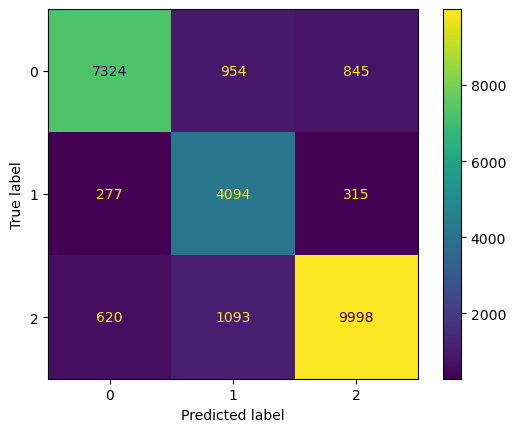

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_classes)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


## TRANSFORMERS

Here i will use Distilberta than the Rioberta because it is faster then the Roberta

In [ ]:
import tensorflow as tf
from transformers import TFDistilBertForSequenceClassification, DistilBertTokenizerFast
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# 1. Prepare 
df = df[['preprocess_description', 'sentiment_preprocess_description']]
df.dropna(inplace=True)

X = df['preprocess_description'].tolist()
y = df['sentiment_preprocess_description'].tolist()

# Encode labels to integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
num_labels = len(label_encoder.classes_)

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#Reduce training data to 2500 samples
X_train = X_train[:2500]
y_train = y_train[:2500]

# 2. Tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")


train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=64, return_tensors="tf")
val_encodings = tokenizer(X_val, truncation=True, padding=True, max_length=64, return_tensors="tf")

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    tf.convert_to_tensor(y_train)
)).shuffle(1000).batch(64)

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    tf.convert_to_tensor(y_val)
)).batch(64)

# 3. Load model
model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)
# 4. Optimizer & loss
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy()

# 5. Training loop
EPOCHS = 1

for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch + 1}/{EPOCHS}")
    # Training
    for step, (batch_inputs, batch_labels) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            logits = model(batch_inputs, training=True).logits
            loss = loss_fn(batch_labels, logits)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        
        if step % 10 == 0:
            print(f"Step {step}, Loss: {loss.numpy():.4f}")
    
    # Evaluation
    metric.reset_state()
    for val_inputs, val_labels in val_dataset:
        val_logits = model(val_inputs, training=False).logits
        metric.update_state(val_labels, val_logits)
    print(f"Validation accuracy: {metric.result().numpy():.4f}")
